In [16]:
using ITensors
using Plots

site types - https://docs.juliahub.com/ITensors/P3pqL/0.3.57/SiteType.html#ITensors.SiteType

Working with MPS and MPO - https://itensor.github.io/ITensors.jl/dev/examples/MPSandMPO.html#MPS-and-MPO-Examples

In [17]:
function Calc_SvN(psi::MPS, b::Int64)
    # Orthogonalize the MPS at bond index b
    orthogonalize!(psi, b)

    # Perform Singular Value Decomposition (SVD)
    U, S, V = svd(psi[b], (linkind(psi, b-1), siteind(psi, b)))

    # Calculate von Neumann entropy
    SvN = 0.0
    for n = 1:dim(S, 1)
        p = S[n, n]^2
        SvN -= p * log(p)
    end

    return SvN
end

Calc_SvN (generic function with 1 method)

## TFIM

In [19]:
function TFIM_DMRG(N::Int64, h::Float64, swp_num::Int64, maxM::Int64)
"""
    TFIM_DMRG(N::Int64, h::Float64, swp_num::Int64, maxM::Int64)

    Perform a Density Matrix Renormalization Group (DMRG) simulation for the Transverse Field Ising Model (TFIM) on a 1D chain.

    Parameters:
    - `N::Int64`: Number of sites in the 1D quantum system.
    - `h::Float64`: Transverse field strength in the TFIM Hamiltonian.
    - `swp_num::Int64`: Number of DMRG sweeps.
    - `maxM::Int64`: Maximum bond dimension.

    Returns:
    - `energy::Float64`: Ground state energy obtained from the DMRG simulation.
    - `psi::MPS`: Matrix Product State (MPS) representing the ground state of the quantum system after DMRG.
"""
    # Generate an index set representing quantum sites with spin S=1/2
    sites = siteinds("S=1/2", N)

    # Initialize an operator sum representing the Hamiltonian using ITensors
    ampo = OpSum()

    # Construct the Hamiltonian operator for the TFIM
    for j = 1:N
        if j < N
            # Interaction term between neighboring spins (Sz-Sz)
            ampo += -2.0, "Sz", j, "Sz", j + 1
        end
        # Transverse field term (Sx) at each site
        ampo += -h, "Sx", j
    end

    # Convert the operator sum to a Matrix Product Operator (MPO)
    H = MPO(ampo, sites)

    # Initialize the initial state to a random maxM=10 state 
    psi0 = randomMPS(sites,10)

    # Set up parameters for the DMRG (Density Matrix Renormalization Group) algorithm
    sweeps = Sweeps(swp_num)
    setmaxdim!(sweeps, maxM)
    setcutoff!(sweeps, 1E-16)

    # Perform the DMRG simulation to obtain the ground state energy and MPS representation
    energy, psi = dmrg(H, psi0, sweeps)

    return energy, psi
end

TFIM_DMRG (generic function with 1 method)

###  Ferromagnetic phase

In [30]:
N = 40
h = 0.1
swp_num = 20
maxM = 20
energy, psi = TFIM_DMRG(N, h, swp_num, maxM);

After sweep 1 energy=-19.55251793776687  maxlinkdim=20 maxerr=5.13E-11 time=0.059
After sweep 2 energy=-19.55253446517045  maxlinkdim=15 maxerr=8.73E-14 time=0.035
After sweep 3 energy=-19.55253446521204  maxlinkdim=3 maxerr=8.62E-17 time=0.015
After sweep 4 energy=-19.55253446521208  maxlinkdim=3 maxerr=6.63E-17 time=0.013
After sweep 5 energy=-19.552534465212076  maxlinkdim=3 maxerr=6.63E-17 time=0.018
After sweep 6 energy=-19.552534465212076  maxlinkdim=3 maxerr=6.63E-17 time=0.014
After sweep 7 energy=-19.55253446521208  maxlinkdim=3 maxerr=6.63E-17 time=0.016
After sweep 8 energy=-19.552534465212076  maxlinkdim=3 maxerr=6.63E-17 time=0.020
After sweep 9 energy=-19.552534465212076  maxlinkdim=3 maxerr=6.63E-17 time=0.014
After sweep 10 energy=-19.552534465212076  maxlinkdim=3 maxerr=6.63E-17 time=0.015
After sweep 11 energy=-19.552534465212076  maxlinkdim=3 maxerr=6.63E-17 time=0.023
After sweep 12 energy=-19.552534465212076  maxlinkdim=3 maxerr=6.63E-17 time=0.013
After sweep 13 e

In [31]:
Z = expect(psi, "Sz") # compute for all sites

40-element Vector{Float64}:
 0.49749371855331087
 0.49935854217720343
 0.4993721352993978
 0.4993722474264985
 0.49937224840252686
 0.4993722484112838
 0.49937224841136346
 0.4993722484113643
 0.4993722484113643
 0.4993722484113643
 0.4993722484113643
 0.4993722484113643
 0.4993722484113643
 ⋮
 0.4993722484113643
 0.4993722484113643
 0.4993722484113643
 0.4993722484113643
 0.4993722484113643
 0.4993722484113636
 0.4993722484112841
 0.4993722484025276
 0.49937224742649977
 0.4993721352993978
 0.49935854217720466
 0.49749371855331215

In [32]:
Czz = correlation_matrix(psi, "Sz", "Sz")[1,:]

40-element Vector{Float64}:
 0.25000000000000006
 0.2484402380489113
 0.24843459426251835
 0.24843455708580903
 0.24843455680672177
 0.24843455680451237
 0.24843455680449716
 0.24843455680449716
 0.24843455680449722
 0.24843455680449728
 0.24843455680449733
 0.2484345568044974
 0.24843455680449744
 ⋮
 0.24843455680449833
 0.24843455680449839
 0.24843455680449844
 0.2484345568044985
 0.24843455680449855
 0.24843455680449825
 0.24843455680445872
 0.2484345568001023
 0.2484345563145345
 0.24843450053200564
 0.24842773803909907
 0.24750000000000266

In [33]:
h = 0.
swp_num = 20
maxM = 20

Ns  = [40, 80, 100, 200]
SvN = zeros(length(Ns)) 

for (i,N) in enumerate(Ns)
    println("DMRG for N=", N)
    energy, psi = TFIM_DMRG(N, h, swp_num, maxM)
    SvN[i] = Calc_SvN(psi, Int.(N/2))
end

DMRG for N=40
After sweep 1 energy=-19.49993931035905  maxlinkdim=20 maxerr=7.85E-11 time=0.034
After sweep 2 energy=-19.499999999625167  maxlinkdim=17 maxerr=9.77E-14 time=0.032
After sweep 3 energy=-19.5  maxlinkdim=2 maxerr=9.45E-17 time=0.013
After sweep 4 energy=-19.5  maxlinkdim=1 maxerr=2.86E-25 time=0.009
After sweep 5 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.008
After sweep 6 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.008
After sweep 7 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.014
After sweep 8 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.008
After sweep 9 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.008
After sweep 10 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.008
After sweep 11 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.009
After sweep 12 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.008
After sweep 13 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.013
After sweep 14 energy=-19.5  maxlinkdim=1 maxerr=7.62E-95 time=0.009


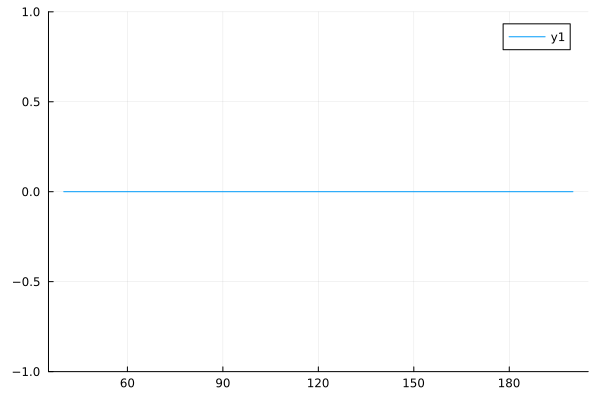

In [34]:
plot(Ns, SvN, ylims = (-1,1))

 ### Paramagnetic phase

In [39]:
N = 80
h = 20.
swp_num = 20
maxM = 20
energy, psi = TFIM_DMRG(N, h, swp_num, maxM);

After sweep 1 energy=-800.2462163132693  maxlinkdim=20 maxerr=8.47E-09 time=0.092
After sweep 2 energy=-800.4916766892834  maxlinkdim=20 maxerr=3.01E-10 time=0.094
After sweep 3 energy=-800.4937995344055  maxlinkdim=20 maxerr=1.60E-12 time=0.092
After sweep 4 energy=-800.4938249413813  maxlinkdim=20 maxerr=9.68E-14 time=0.067
After sweep 5 energy=-800.4938252401039  maxlinkdim=18 maxerr=2.08E-16 time=0.043
After sweep 6 energy=-800.4938252411487  maxlinkdim=4 maxerr=9.87E-17 time=0.033
After sweep 7 energy=-800.4938252411447  maxlinkdim=4 maxerr=9.77E-20 time=0.031
After sweep 8 energy=-800.493825241146  maxlinkdim=4 maxerr=9.34E-20 time=0.031
After sweep 9 energy=-800.4938252411429  maxlinkdim=4 maxerr=9.34E-20 time=0.031
After sweep 10 energy=-800.4938252411454  maxlinkdim=4 maxerr=9.34E-20 time=0.031
After sweep 11 energy=-800.4938252411439  maxlinkdim=4 maxerr=9.34E-20 time=0.032
After sweep 12 energy=-800.4938252411451  maxlinkdim=4 maxerr=9.34E-20 time=0.032
After sweep 13 energy

In [40]:
X = expect(psi, "Sx") # compute for all sites

80-element Vector{Float64}:
 0.49984370113368637
 0.49968747554010245
 0.4996873535232031
 0.49968735336308434
 0.49968735336282927
 0.49968735336282893
 0.4996873533628292
 0.4996873533628295
 0.49968735336282966
 0.4996873533628298
 0.49968735336283
 0.4996873533628302
 0.49968735336283043
 ⋮
 0.49968735336284126
 0.4996873533628414
 0.49968735336284176
 0.4996873533628419
 0.49968735336284215
 0.49968735336284237
 0.49968735336284253
 0.4996873533628433
 0.4996873533630991
 0.4996873535232186
 0.49968747554011844
 0.4998437011337019

In [41]:
h = 2.
swp_num = 20
maxM = 20

Ns  = [40, 80, 100, 200]
SvN = zeros(length(Ns)) 

for (i,N) in enumerate(Ns)
    println("DMRG for N=", N)
    energy, psi = TFIM_DMRG(N, h, swp_num, maxM)
    SvN[i] = Calc_SvN(psi, Int.(N/2))
end

DMRG for N=40
After sweep 1 energy=-42.44403216442172  maxlinkdim=20 maxerr=1.60E-08 time=0.052
After sweep 2 energy=-42.475936156159186  maxlinkdim=20 maxerr=5.39E-10 time=0.043
After sweep 3 energy=-42.4759917601757  maxlinkdim=20 maxerr=2.04E-12 time=0.046
After sweep 4 energy=-42.47599185658167  maxlinkdim=20 maxerr=1.41E-14 time=0.039
After sweep 5 energy=-42.47599185660251  maxlinkdim=11 maxerr=9.83E-17 time=0.026
After sweep 6 energy=-42.475991856602654  maxlinkdim=11 maxerr=6.17E-17 time=0.023
After sweep 7 energy=-42.47599185660264  maxlinkdim=11 maxerr=6.17E-17 time=0.023
After sweep 8 energy=-42.47599185660267  maxlinkdim=11 maxerr=6.17E-17 time=0.019
After sweep 9 energy=-42.475991856602676  maxlinkdim=11 maxerr=6.17E-17 time=0.023
After sweep 10 energy=-42.47599185660265  maxlinkdim=11 maxerr=6.17E-17 time=0.023
After sweep 11 energy=-42.47599185660265  maxlinkdim=11 maxerr=6.17E-17 time=0.019
After sweep 12 energy=-42.475991856602576  maxlinkdim=11 maxerr=6.17E-17 time=0.

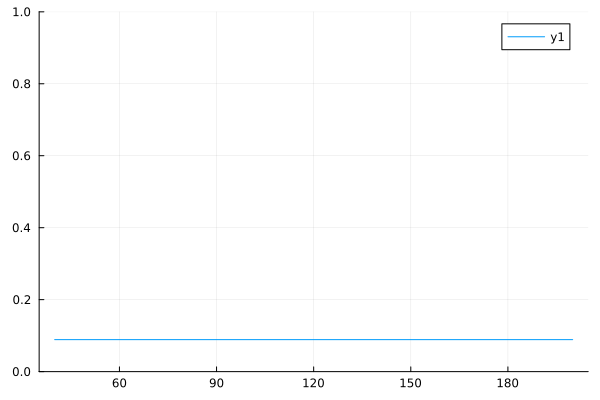

In [42]:
plot(Ns, SvN, ylims = (0,1))

## Heisenberg chain (with $S^z$ conservation)

In [ ]:
# Number of sites in the 1D quantum system
N = 100

# Generate an index set representing quantum sites with spin S=1/2, conserving quantum numbers
sites = siteinds("S=1/2", N; conserve_qns=true)

# Initialize an operator sum representing the Hamiltonian using ITensors
ampo = OpSum()

# Construct the Hamiltonian operator for the 1D quantum system
for j = 1:N-1
    # Heisenberg interaction term (Sz-Sz)
    ampo += "Sz", j, "Sz", j+1
    # Spin-flip terms (S+, S- and S-, S+) with coupling strength 1/2
    ampo += 1/2, "S+", j, "S-", j+1
    ampo += 1/2, "S-", j, "S+", j+1
end

# Convert the operator sum to a Matrix Product Operator (MPO)
H = MPO(ampo, sites)

# Initialize the initial state to an antiferromagnetic (AFM) state with total Sz=0
+psi0 = productMPS(sites, state)

# Display the total flux of the initial state
@show flux(psi0)

# Set up parameters for the DMRG (Density Matrix Renormalization Group) algorithm
sweeps = Sweeps(10)
setmaxdim!(sweeps, 20, 50, 100)
setcutoff!(sweeps, 1E-12)

# Perform the DMRG simulation to obtain the ground state energy and MPS representation
energy, psi = dmrg(H, psi0, sweeps)
